In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [12]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Load the CSV file into a pandas DataFrame
# Replace 'data.csv' with the exact filename if different
df = pd.read_csv('ChurnData.csv')

# Step 3: Split into features and labels
# Assuming the last column is the label
X = df.iloc[:, :-1].values  # all rows, all columns except last
y = df.iloc[:, -1].values   # all rows, last column (label)

# Step 4: Convert labels from {0,1} to {-1,1} for AdaBoost
y = np.where(y == 0, -1, 1)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Saving ChurnData.csv to ChurnData (2).csv


In [ ]:
class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples, _ = X.shape
        # Initialize weights
        w = np.ones(n_samples) / n_samples

        for i in range(self.n_estimators):
            # Create a decision stump
            stump = DecisionTreeClassifier(max_depth=1)
            stump.fit(X, y, sample_weight=w)
            pred = stump.predict(X)

            # Compute error and alpha
            err = np.sum(w * (pred != y)) / np.sum(w)
            if err > 0.5:
                continue
            alpha = 0.5 * np.log((1 - err) / (err + 1e-10))

            # Update weights
            w *= np.exp(-alpha * y * pred)
            w /= np.sum(w)

            # Save model and alpha
            self.models.append(stump)
            self.alphas.append(alpha)

    def predict(self, X):
        clf_preds = np.array([alpha * model.predict(X) for model, alpha in zip(self.models, self.alphas)])
        return np.sign(np.sum(clf_preds, axis=0))


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_pca = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_pca.fit(X_train_pca, y_train)

# Use decision boundary code here with X_train_pca instead


SVC()

   tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   longmon  ...  pager  internet  callwait  confer  ebill  loglong  logtoll  \
0     4.40  ...    1.0       0.0       1.0     1.0    0.0    1.482    3.033   
1     9.45  ...    0.0       0.0       0.0     0.0    0.0    2.246    3.240   
2     6.30  ...    0.0       0.0       0.0     1.0    0.0    1.841    3.240   
3     6.05  ...    1.0       1.0       1.0     1.0    1.0    1.800    3.807   
4     7.10  ...    0.0       0.0       1.0     1.0    0.0    1.960    3.091   

   lninc  custcat  churn  
0  4.913      4.0    1.0  
1  3.497      

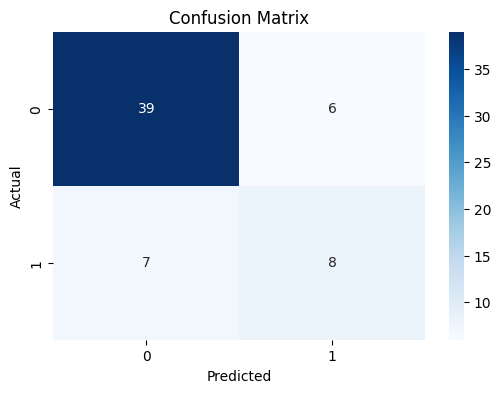

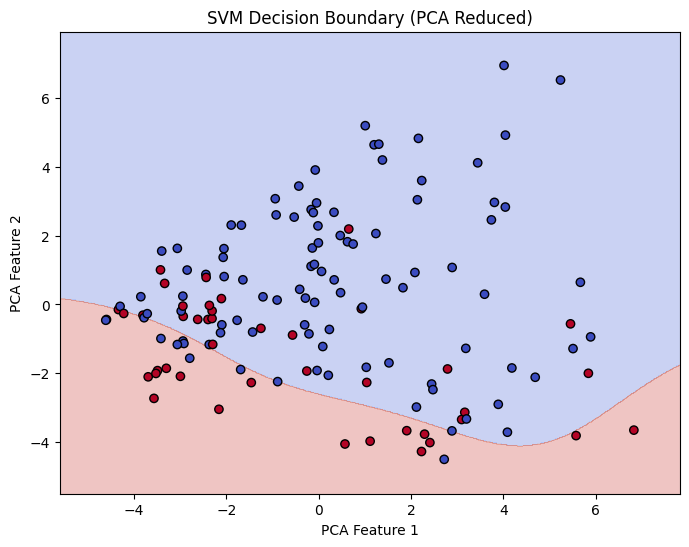

In [20]:
# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

# 2️⃣ Load dataset
df = pd.read_csv("ChurnData.csv")  # Change filename if needed
print(df.head())

# 3️⃣ Separate features & labels (last column is target)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode target if it’s text labels
if y.dtype == object:
    le = LabelEncoder()
    y = le.fit_transform(y)

# 4️⃣ Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5️⃣ Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️⃣ Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# 7️⃣ Predict & evaluate
y_pred = svm_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 8️⃣ PCA for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Train SVM on PCA-reduced data
svm_2d = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_2d.fit(X_train_2D, y_train)

# Create meshgrid for plotting decision boundary
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict over the grid
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("SVM Decision Boundary (PCA Reduced)")
plt.show()
